# Usage & Examples

## Basic functionalities

### 1. Applying the style sheet: lizard_style()

The package includes **a built-in style sheet**, designed to standardize and enhance the visual appeal of your plots. This style sheet configures various elements, ranging from fonts and font sizes to axis and grid settings, and even the default colors for multiple lines in a plot. Applying this style, which is also possible in the R package with + lizard_style() provides a **consistent look**, whether you're using ggplot in R or matplotlib/seaborn in Python.

You can apply the Biolizard-look by placing `lizard_style()` at the top of your scripts after importing BioLizardStylePython. Please note that `lizard_style()` serves as a starting template and may not be the ideal style for every plot. You can easily customize individual style settings by placing your overrides after calling the `lizard_style()` function. Use `plt.style.use('default')` to return back to the default style.

Here's a demonstration of how a simple line plot would look before and after applying the `lizard_style()`:

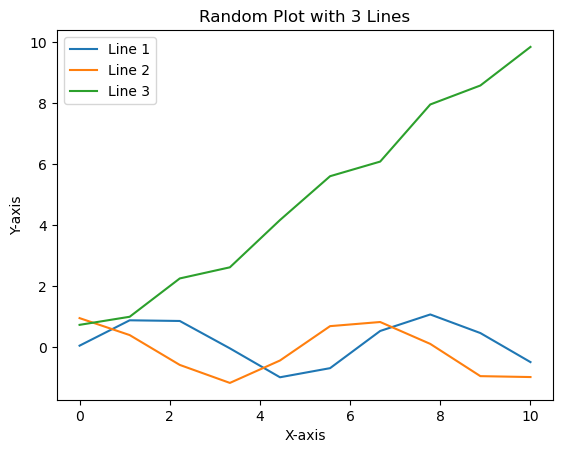

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BioLizardStylePython import *
np.random.seed(42)

# Function to create random lineplot
def create_line_plot():
    x = np.linspace(0, 10, 10)
    y1 = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)
    y2 = np.cos(x) + np.random.normal(0, 0.1, size=x.shape)
    y3 = x + np.random.normal(0, 0.5, size=x.shape)
    plt.figure()
    plt.plot(x, y1, label='Line 1')
    plt.plot(x, y2, label='Line 2')
    plt.plot(x, y3, label='Line 3')
    plt.title('Random Plot with 3 Lines')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

create_line_plot()

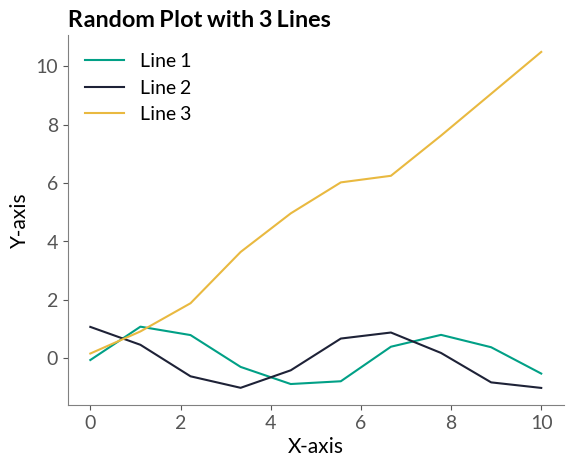

In [2]:
lizard_style()
create_line_plot()

### 2. Using the color palettes

<!-- The `biolizard_qualitative_pal()` function **retrieves a predefined qualitative colormap**. For instance, `biolizard_qualitative_pal().colors` returns a list of all 12 colors in hex code. Calling `biolizard_qualitative_pal()(0)` fetches the first color in the palette, while `biolizard_qualitative_pal()(range(5))` retrieves the first five colors.

Here's two examples illustrating how to use this function: -->


There are two discrete colormaps and 4 continuous colormaps available in the BioLizard style packages.
Discrete: 

* biolizard_qualitative_pal: Colorblind-safe qualitative color palette starting with Biolizard's signature green, blue and yellow. This is the default for discrete data.
* biolizard_paired_pal: Colorblind-safe qualitative color palette inspired by Biolizard's signature colors, especially suited for levels that are related 2-by-2.

These colormaps are available as `matplotlib.colors.ListedColormap` objects.

Continuous:

* biolizard_hues_pal: Designed for **discrete** data with many levels:  Maps each level to an evenly spaced hue on the color wheel, starting with Biolizard's signature green. DOES NOT generate colorblind-safe palettes.
* biolizard_sequential_pal: Sequential color palette inspired by Biolizard's signature green.
* biolizard_divergent_pal: Divergent color palette inspired by Biolizard's signature green.
* l_viridis_pal: Sequential color palette inspired by the viridis color scale, passing through Biolizard's signature yellow and green. This is the default for continuous data.

These colormaps are available as `matplotlib.colors.LinearSegmentedColormap` objects and have also been registered with matplotlib and can be used by passsing their name to the `palette` (seaborn) or `cmap` (matplotlib) parameters, where available.


Note that you can also access the three base colors using:
- `blz_green` ("#01a086")
- `blz_blue` (#1e2237)
- `blz_yellow` (#e9b940)

In [3]:
blz_green

'#01a086'

#### 2.1 Discrete data

Following color scales were designed for discrete data: 

**biolizard_qualitative_pal**: Colorblind-safe qualitative color palette starting with Biolizard's signature green, blue and yellow. This is the default for discrete data.

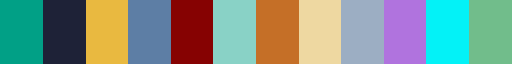

In [4]:
biolizard_qualitative_pal

**biolizard_paired_pal**: Colorblind-safe qualitative color palette inspired by Biolizard's signature colors, especially suited for levels that are related 2-by-2.

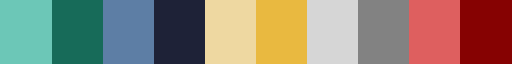

In [5]:
biolizard_paired_pal

**biolizard_hues_pal**: Note that while this is technically a continuous scale, it is designed for **discrete** data with many levels:  Maps each level to an evenly spaced hue on the color wheel, starting with Biolizard's signature green. DOES NOT generate colorblind-safe palettes.

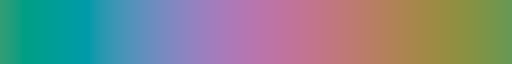

In [6]:
biolizard_hues_pal

Adding the suffix "_r" reverses these palettes: 

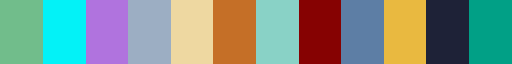

In [7]:
biolizard_qualitative_pal_r

Colors can be retrieved from the discrete colorscales by passing a range to the palettes (returns an array of rgba values), or by using the `.colors` attribute (returns a list of all colors in the palette). 

In [8]:
biolizard_qualitative_pal(range(5))

array([[0.00392157, 0.62745098, 0.5254902 , 1.        ],
       [0.11764706, 0.13333333, 0.21568627, 1.        ],
       [0.91372549, 0.7254902 , 0.25098039, 1.        ],
       [0.36470588, 0.49411765, 0.64705882, 1.        ],
       [0.5254902 , 0.00784314, 0.00784314, 1.        ]])

In [9]:
biolizard_qualitative_pal.colors

['#01A086',
 '#1E2237',
 '#E9B940',
 '#5D7EA5',
 '#860202',
 '#89D2C6',
 '#C56F27',
 '#EED8A1',
 '#9CAEC3',
 '#B073DE',
 '#03F2F7',
 '#71BD8B']

Since `biolizard_hues_pal` is encoded as a continuous color palette, passing a range will lilely NOT yeild the desired effect, as the continuous color scale is represented by a sequence of 255 colors. Passing e.g. `range(5)` will only retrieve the first 5 of these 255 colors. Instead, use `np.linspace` to ensure all colors are spaced evenly across the colorscale: 

In [10]:
ncolors = 5
rgbacolors = biolizard_hues_pal(np.linspace(0, 1, ncolors))

Then, you can use `matplotlib.colors.rgb2hex` to obtain hex values if needed:

In [11]:
[matplotlib.colors.rgb2hex(col) for col in rgbacolors]

['#319d74', '#4f93ba', '#b975ad', '#b4805c', '#669855']

##### 2.1.1 Seaborn

Note that biolizard_qualitative_pal is the default colorscale for discrete data:

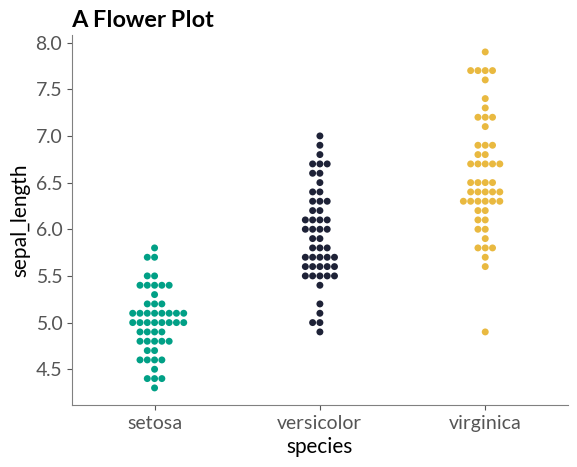

In [12]:
import seaborn as sns
# Sample data
data = sns.load_dataset("iris")
sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data)
plt.title('A Flower Plot')
plt.show()

Other discrete colormaps can be chosen by specifying a list of colors:

/tmp/ipykernel_1885402/3631860700.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette=biolizard_paired_pal.colors)


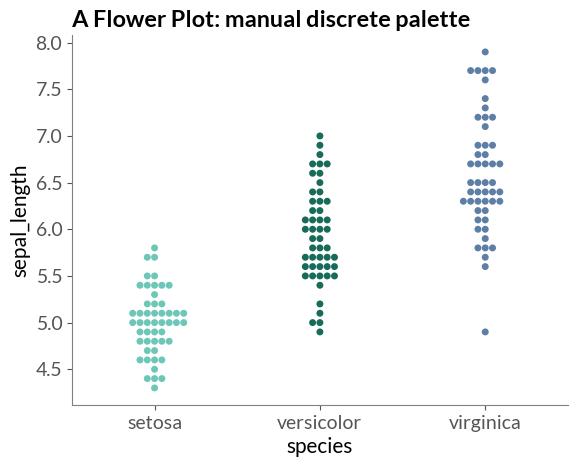

In [13]:
sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette=biolizard_paired_pal.colors)
plt.title('A Flower Plot: manual discrete palette')
plt.show()

Continuous colormaps can be referenced by their name, this ensures that colors are picked across the entire range of the continous scale:

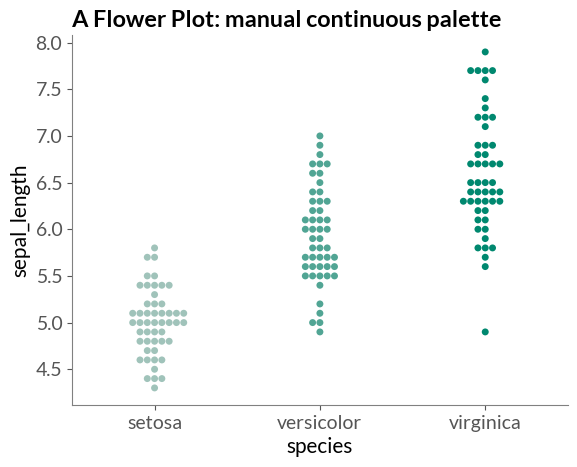

In [14]:
sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette="biolizard_sequential_pal")
plt.title('A Flower Plot: manual continuous palette')
plt.show()

##### 2.1.2 Matplotlib

Colors from the discrete scale can be passed to the `color` parameter of `plt.bar` for example:

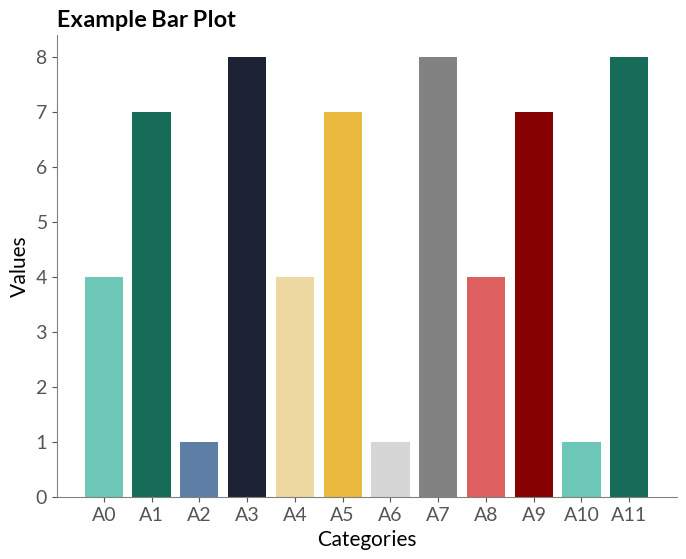

In [15]:
# Data for the bar plot
categories = ['A'+str(i) for i in range(12)]
values = [4, 7, 1, 8]*3

# Create the bar plot
# .colors returns a list that can be used for the color parameter 
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=biolizard_paired_pal.colors)

# Add title and labels
plt.title('Example Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

plt.show()

Note that in case the colorscale contains less levels than the data, colors are recycled without warning! 

To use a continuous scale, we need to take colors at regular intervals across the colormap:



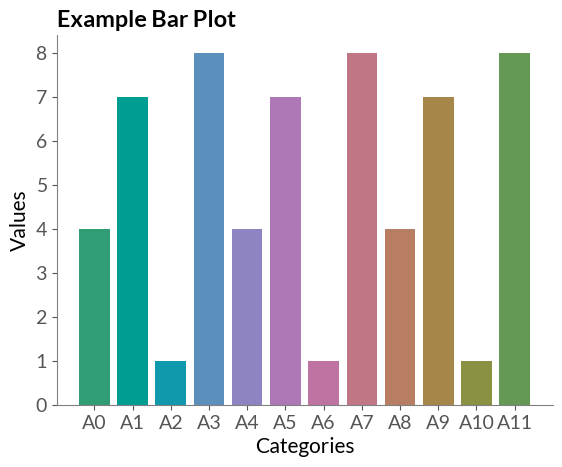

In [16]:
# take colors at regular intervals across the colormap
colors = biolizard_hues_pal(np.linspace(0, 1, len(categories)))

bars = plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Example Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

plt.show()

#### 2.2 Continuous data

Following color scales were designed for continous data: 

**l_viridis_pal**: Sequential color palette inspired by the viridis color scale, passing through Biolizard's signature yellow and green. This is the default for continuous data.

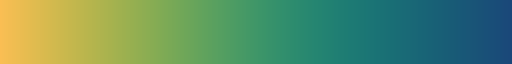

In [17]:
l_viridis_pal

**biolizard_sequential_pal**: Sequential color palette inspired by Biolizard's signature green.

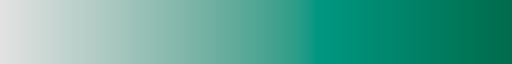

In [18]:
biolizard_sequential_pal

**biolizard_divergent_pal**: Divergent color palette inspired by Biolizard's signature green.


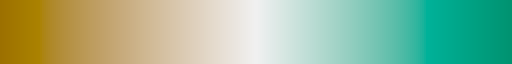

In [19]:
biolizard_divergent_pal

Adding the suffix "_r" reverses these palettes: 

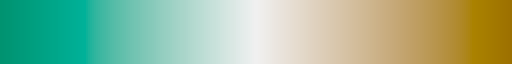

In [20]:
biolizard_divergent_pal_r

Colors can be retrieved from the continuous colorscales by passing an array of the desired length to the palettes, this returns an array of rgba values. Note that internally, each continuous color scale is represented as a sequence of 255 colors. All these colors can be retrieved by passing range(255) to your color scale of choice:

In [21]:
l_viridis_pal(range(255))

array([[0.98047708, 0.74741876, 0.32824584, 1.        ],
       [0.97453872, 0.74675386, 0.3270615 , 1.        ],
       [0.96860339, 0.74608207, 0.3259049 , 1.        ],
       ...,
       [0.10233947, 0.28989547, 0.47624979, 1.        ],
       [0.10272789, 0.28712708, 0.47695401, 1.        ],
       [0.10313784, 0.28434012, 0.47768985, 1.        ]])

When manually selecting colors from the palette, use `np.linspace` to ensure colors are spaced evenly across the palette:

In [22]:
ncolors = 10
rgbacolors = l_viridis_pal(np.linspace(0, 1, ncolors))

Lastly, you can use `matplotlib.colors.rgb2hex` to obtain hex values if needed:

In [23]:
[matplotlib.colors.rgb2hex(col) for col in rgbacolors]

['#fabf54',
 '#d0b94e',
 '#a5b24f',
 '#79a957',
 '#519e62',
 '#318f6d',
 '#1f7e74',
 '#196c76',
 '#195b77',
 '#1a487a']

##### 2.2.1 Matplotlib

Note that l_viridis is the default colorscale:

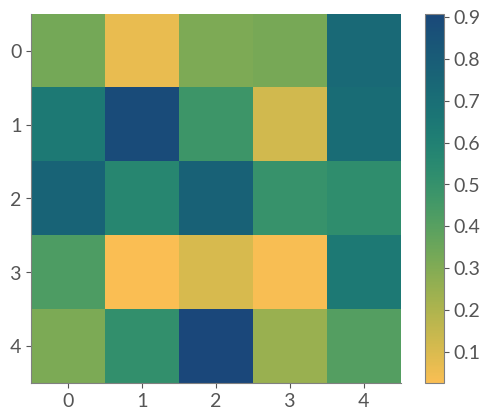

In [24]:
data = np.random.rand(5, 5)  # Example data
plt.imshow(data)
plt.colorbar()
plt.show()

The continous palettes have been registered with matplotlotlib and their names can be passed to the `cmap` parameter to change the continuous scale: 

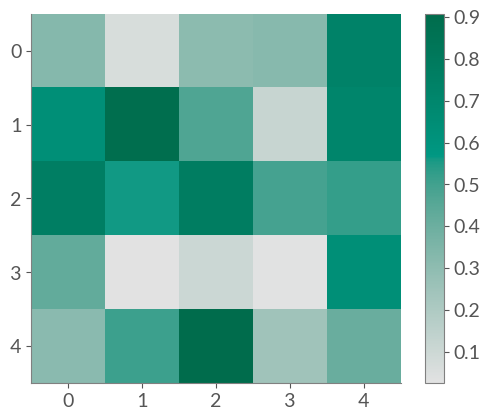

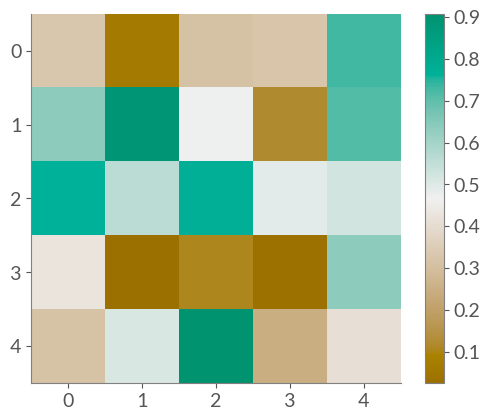

In [25]:

plt.imshow(data, cmap='biolizard_sequential_pal')
plt.colorbar()
plt.show()

plt.imshow(data, cmap='biolizard_divergent_pal')
plt.colorbar()
plt.show()

The corresponding palettes with suffix '_r' reverse the colors:

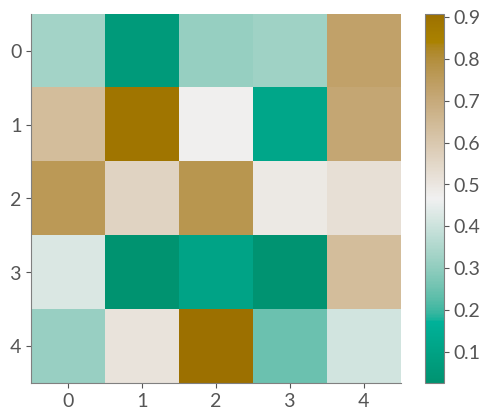

In [26]:
plt.imshow(data, cmap='biolizard_divergent_pal_r')
plt.colorbar()
plt.show()

##### 2.2.2 Seaborn

!! default not working for some reason: 

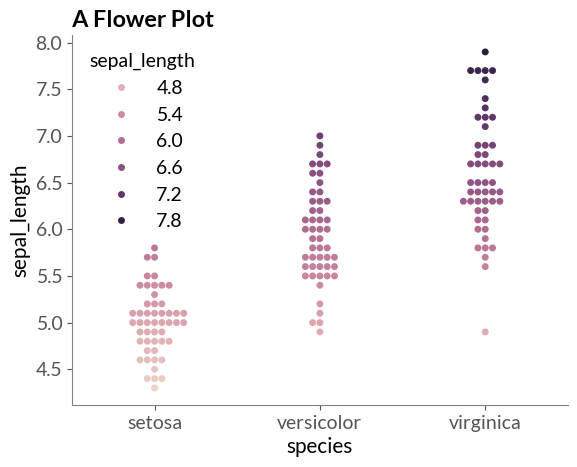

In [27]:
data = sns.load_dataset("iris")
sns.swarmplot(x="species", y="sepal_length", hue ="sepal_length", data=data)
plt.title('A Flower Plot')
plt.show()

The names of the palettes can be passed to the `palette` parameter to change the continuous scale: 

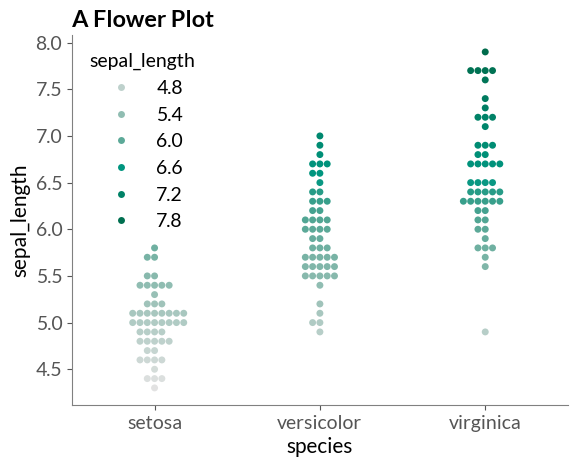

In [28]:
data = sns.load_dataset("iris")
sns.swarmplot(x="species", y="sepal_length", hue ="sepal_length", data=data, palette="biolizard_sequential_pal")
plt.title('A Flower Plot')
plt.show()

#### 3. Appending a BioLizard footer: finalise_lizardplot()

The `finalise_lizardplot` function finalizes a matplotlib plot by appending a footer at the bottom and saving the resulting image. The footer includes a BioLizard logo and a customizable source text.

**Parameters**

- `plot`: The input matplotlib figure to be finalized.
- `source_text`: The source text to display at the bottom.
- `fontsize`: (Optional) Font size of the source text. Defaults to 12.
- `pdf`: (Optional) If True, saves as PDF. Otherwise, saves as PNG. Defaults to False.
- `output_name`: (Optional) Name of the output file. Defaults to "TempLizardPlot".
- `save_filepath`: (Optional) Full path to save the output. Takes precedence over `output_name`.

Here's an example:


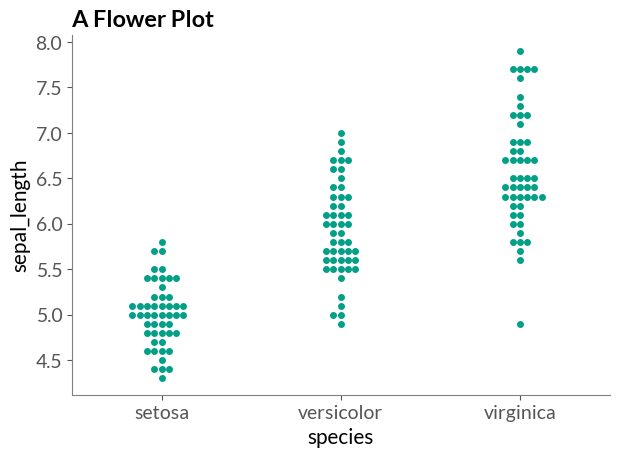

In [29]:
data = sns.load_dataset("iris")
fig = plt.figure()
sns.swarmplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
finalise_lizardplot(fig,
                  'Source: https://en.wikipedia.org/wiki/Iris_flower_data_set ',
                  fontsize=10, pdf=True, output_name='An_Iris_Plot')

#Please take a look in your current working directory to see the result!

## Examples

### 1. simple boxplot

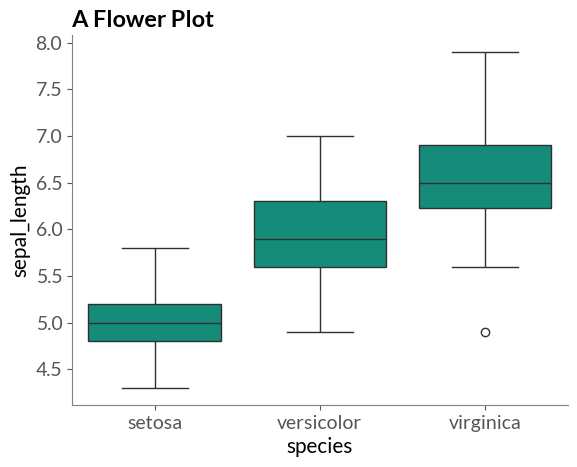

In [30]:
sns.boxplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
plt.show()

A violin plot is similar to a boxplot, but captures more information on the data distribution:

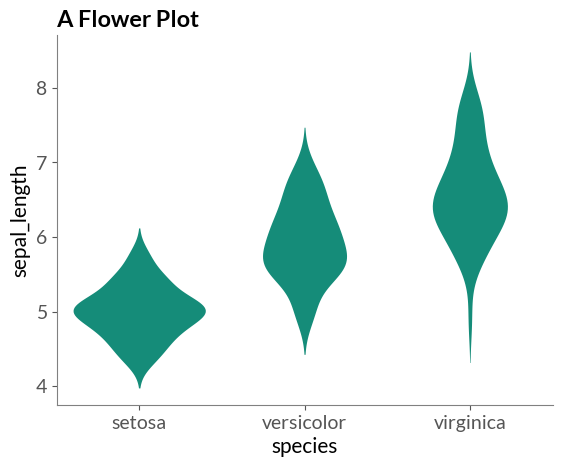

In [31]:
sns.violinplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
plt.show()

### 2. Simple density plot

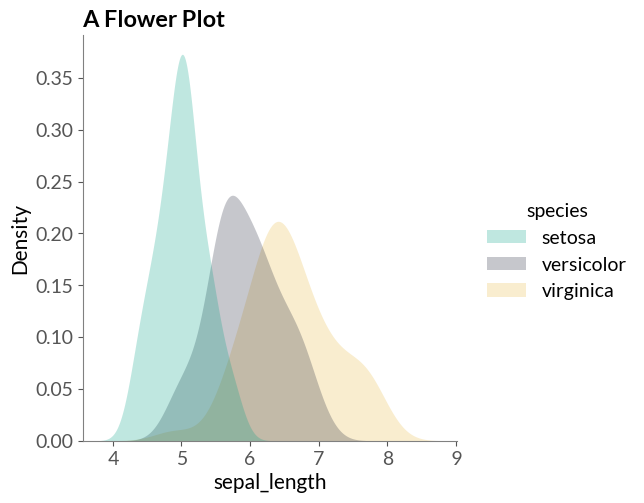

In [32]:
sns.displot(data, x="sepal_length", hue="species", kind="kde", fill=True)
plt.title('A Flower Plot')
plt.show()

### 3. Simple scatterplot

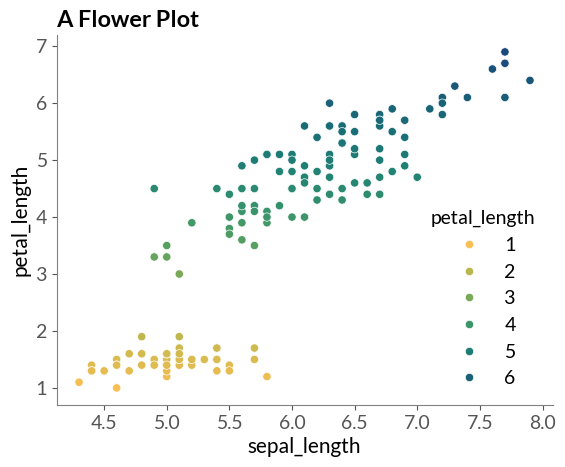

In [33]:
sns.scatterplot(data, x='sepal_length', y='petal_length', hue='petal_length', palette='l_viridis_pal')
plt.title('A Flower Plot')
plt.show()

We can use `lmplot` or `regplot` to add a regression line:

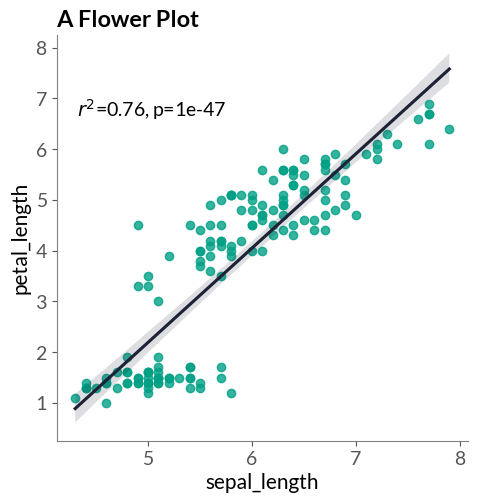

In [34]:
import scipy as sp

g = sns.lmplot(data, x='sepal_length', y='petal_length', line_kws=dict(color=blz_blue))

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['sepal_length'], data['petal_length'])
    ax = plt.gca()
    ax.text(.05, .8, '$r^2$={:.2f}, p={:.2g}'.format(r**2, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.title('A Flower Plot')
plt.show()

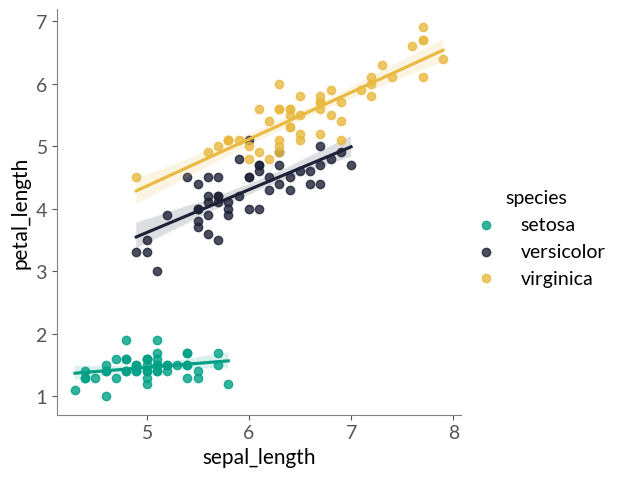

In [35]:
# specify hue to show the three species
sns.lmplot(data, x='sepal_length', y='petal_length', hue='species')


Note that using the reversed palette starts picking the colors from the end of the palette. If you want to pick the colors you need, and reverse them afterward (eg yellow-blue-green instead of green-blue-yellow), use the regular palette and reverse the colors after picking them:

/tmp/ipykernel_1885402/3460807827.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


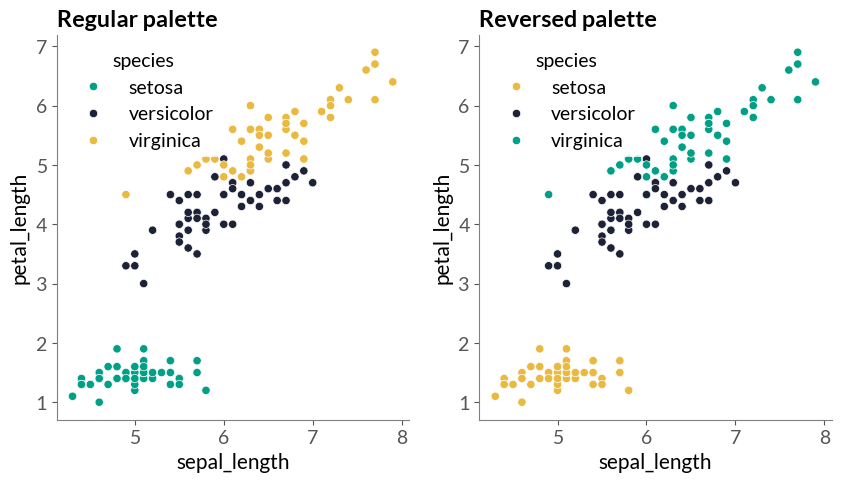

In [36]:
my_colors = biolizard_qualitative_pal.colors[0:3]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# regular palette
sns.scatterplot(data, x='sepal_length', y='petal_length', hue='species',
           palette=my_colors, ax=axes[0])
axes[0].set_title('Regular palette')

# reversed
my_colors.reverse()
sns.scatterplot(data, x='sepal_length', y='petal_length', hue='species',
           palette=my_colors, ax=axes[1])
axes[1].set_title('Reversed palette')

fig.show()


### 4. Facets

Facetting is a great way to lay out related plots side-by-side, with the axes either on the same scale or on different scales.

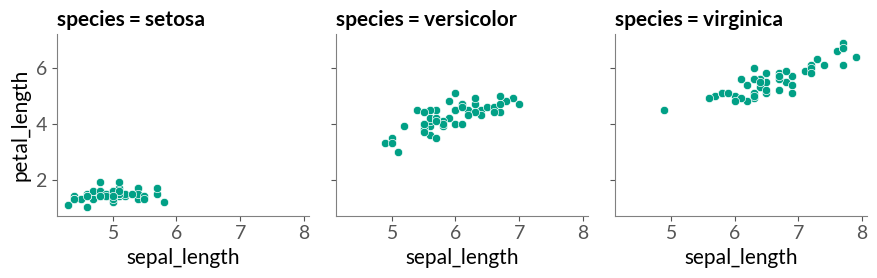

In [37]:
g = sns.FacetGrid(data, col="species")
g.map_dataframe(sns.scatterplot, x='sepal_length', y='petal_length')

### 5. Treemap plots

Treemap plots can be used as an alternative for bar charts, for example when there are so many categories that a bar chart may not be clear anymore.
In this example, more colors are requested than are present in the qualitative color scales. The `biolizard_hues_pal` palette was developped for situations like this. It maps each level to an evenly spaced hue on the color wheel, starting with Biolizard's signature green, but it DOES NOT generate colorblind-safe palettes.

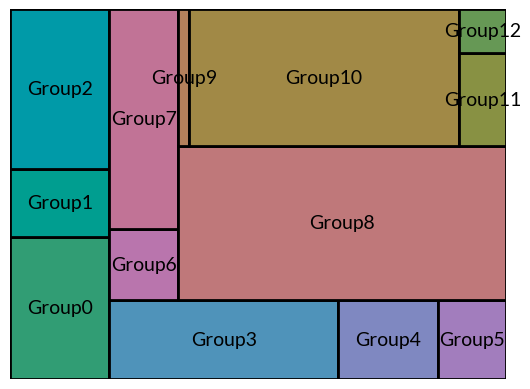

In [38]:
import squarify

# Sample data
values = [250, 120, 280, 320, 140, 95, 87, 270, 896, 25, 654, 78, 37]
labels = ['Group'+str(i) for i,_ in enumerate(values)]

# take colors at regular intervals across the colormap
colors = biolizard_hues_pal(np.linspace(0, 1, len(values)))

# Treemap
squarify.plot(sizes = values, label = labels, color = colors,
              text_kwargs={'color':'black'},
              edgecolor="black", linewidth=2)

# Remove the axis:
plt.axis("off")

plt.show()

### 6. Fun with maps

This example was taken from: https://matplotlib.org/basemap/stable/users/examples.html.

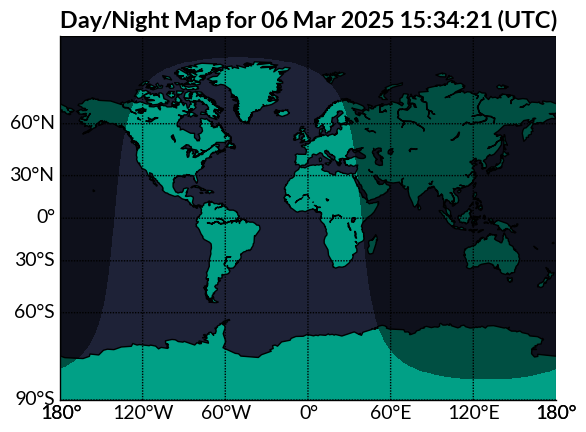

In [39]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

# miller projection 
map = Basemap(projection='mill',lon_0=0)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
map.drawmapboundary(fill_color=blz_blue)
map.fillcontinents(color=blz_green,lake_color=blz_blue)
# shade the night areas, with alpha transparency so the 
# map shows through. Use current time in UTC.
date = datetime.now()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()